# Introduction

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5 CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

We will be taking the help of a Logistic Regression model to classify a person on whether they have heart disease or not using some useful predictors such as their age, blood pressure, sugar levels, cholestrol levels, heart rate and other factors.

The dataset we will be using comes from the famous Cleveland Clinic Foundation, which recorded information on various patient characteristics, including age and chest pain, to try to classify the presence of heart disease in an individual. This a prime example of how machine learning can help solve problems that have a real impact on people's lives.

# Importing neccessary libraries

In [108]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Loading the data

In [109]:
heart_data = pd.read_csv('heart_disease.csv')
print(heart_data.head())
print(heart_data.shape)

   sn  age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0   1   63    1   1       145   233    1        2      150      0      2.3   
1   2   67    1   4       160   286    0        2      108      1      1.5   
2   3   67    1   4       120   229    0        2      129      1      2.6   
3   4   37    1   3       130   250    0        0      187      0      3.5   
4   5   41    0   2       130   204    0        2      172      0      1.4   

   slope ca thal  present  
0      3  0    6        0  
1      2  3    3        1  
2      2  2    7        1  
3      3  0    3        0  
4      1  0    3        0  
(303, 15)


Our data has 303 rows of data. The target variable of or dataset is the 'present' column which contains two values - 1 and 0, where 1 states the person has heart disease and 0 informs us that the person does not have heart disease.

We can remove the 'sn' column from our dataset as it just contains the serial number of the row.

The source of the dataset gives us the following information about the rest of the columns - 

* age - age of the patient
* sex - sex of the patient
* cp -  chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic
* trestbps - resting blood pressure (on admission to the hospital)
* chol - serum cholestoral	mg/dl
* fbs -	fasting blood sugar > 120 mg/dl
* restecg - resting ECG
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalach - maximum heart rate achieved
* exang	- exercise induced angina
* oldpeak - ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping
* ca: number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [110]:
heart_data = heart_data.drop('sn', axis=1)
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  present   303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


Our dataset contains no null values. The 'ca' and 'thal' columns have 'object' data value type which we need to investigate.

In [111]:
print(heart_data['ca'].value_counts())
print(heart_data['thal'].value_counts())

0    176
1     65
2     38
3     20
?      4
Name: ca, dtype: int64
3    166
7    117
6     18
?      2
Name: thal, dtype: int64


The reason for the data type was the '?' character which is likely indicating that no information is available in that regard. We can remove the rows all together or fill the data with the most occuring value from that column. We will do the latter since there are not many data points to begin with. 

In [112]:
heart_data['ca'] = heart_data['ca'].replace('?', 0)
heart_data['thal'] = heart_data['thal'].replace('?', 3)

heart_data['ca'] = heart_data['ca'].astype('int64')
heart_data['thal'] = heart_data['thal'].astype('int64')
print(heart_data['ca'].value_counts())
print(heart_data['thal'].value_counts())

0    180
1     65
2     38
3     20
Name: ca, dtype: int64
3    168
7    117
6     18
Name: thal, dtype: int64


We can now start doing exploratary data analysis on our dataset.

# Exploratory Data Analysis

We will need to divide the columns of our dataset into 'discrete' and 'continuous' columns.

In [113]:
discrete_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
continuous_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

For our discrete columns we will make a countplot while a scatter plot will be made for our continuous columns to determine any relationship with our target variable 'present'.

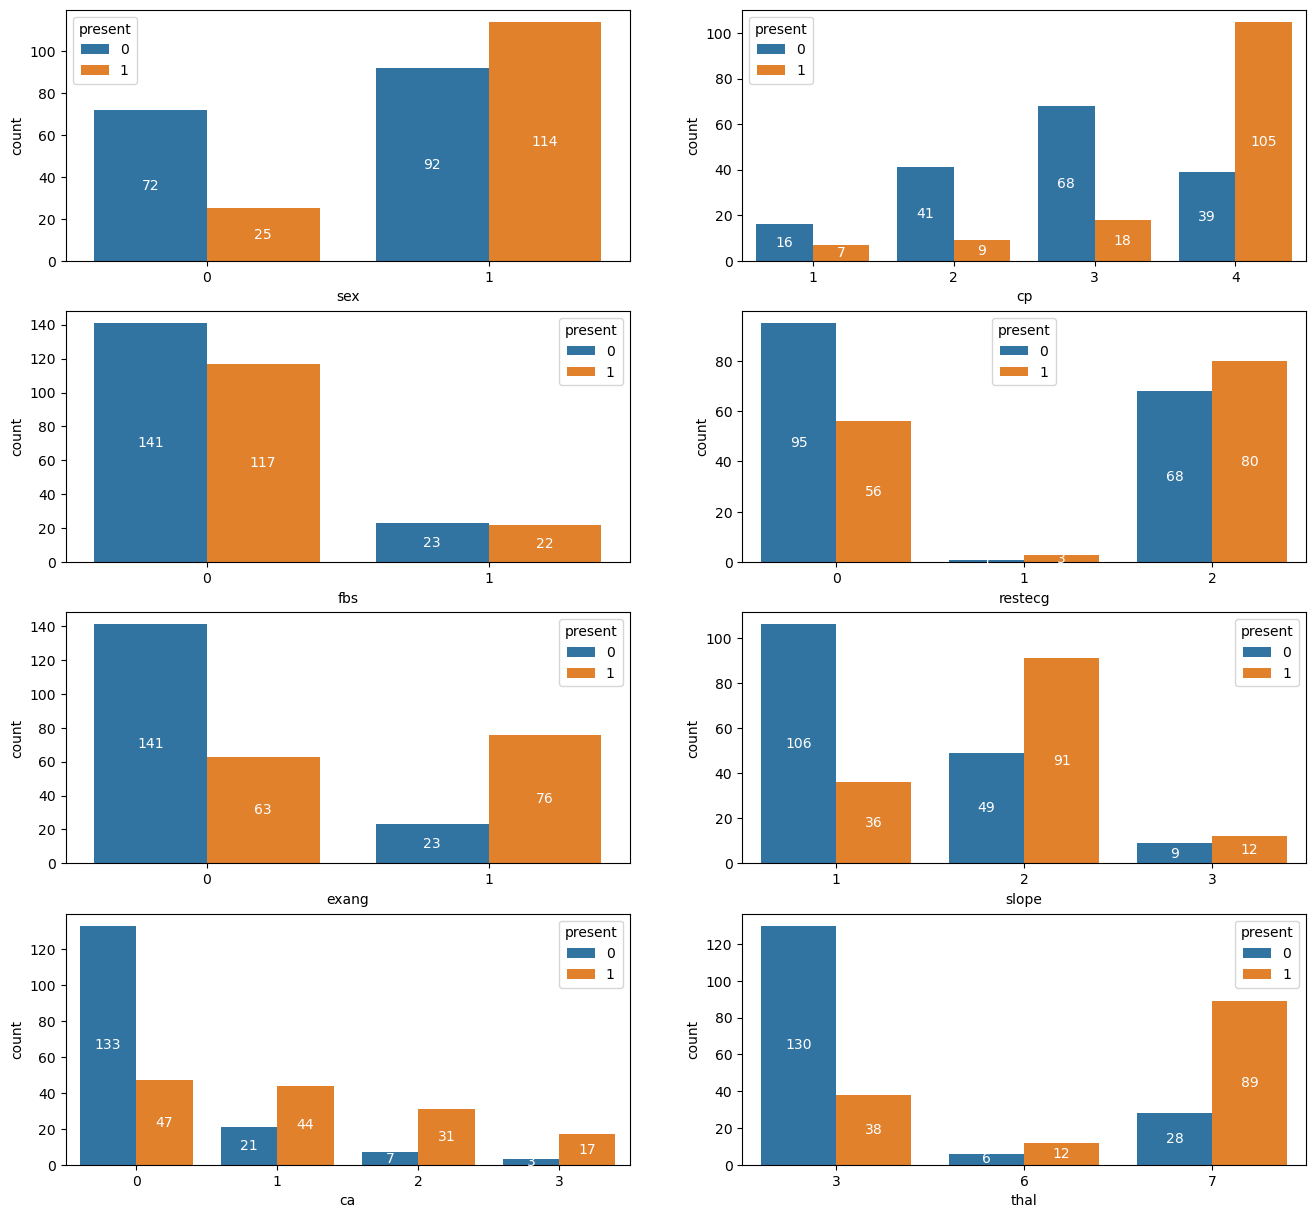

In [114]:
fig = plt.figure(figsize=(16,15))

for idx, col in enumerate(discrete_columns):
    ax = plt.subplot(4, 2, idx+1)
    sns.countplot(x=heart_data[col], hue=heart_data["present"], ax=ax)
    for container in ax.containers:
        ax.bar_label(container, label_type="center", color='white')

Some observations - 

* 'Sex' variable doesn't have a clear link with heart disease.
* 'cp' i.e. Chest pain has a good association with Heart disease. The interesting thing to note is that the value'4', which represents asymptomatic patients, had the highest occurence of heart disease.
* Fasting blood sugar and Resting ECG dosen't show a clear link with heart disease.
* Excercise Angina and slope both show a good link to heart disease, but is not too obvious.
* 'ca' and 'thal' both show a very good interconnection with heart disease.

If we were to pick the predictors having the most interdependence with heart disease, we could say that 'cp', 'ca' and 'thal' would be the best contenders. We can now assess the relationship of continuous variables with heart disease.

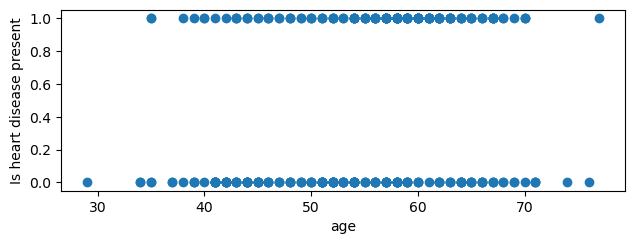

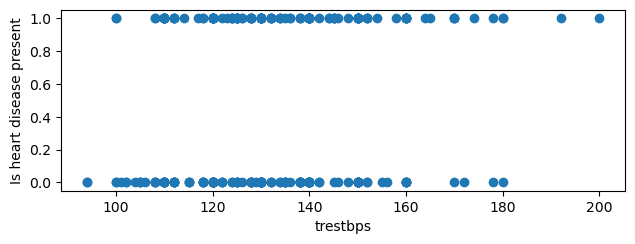

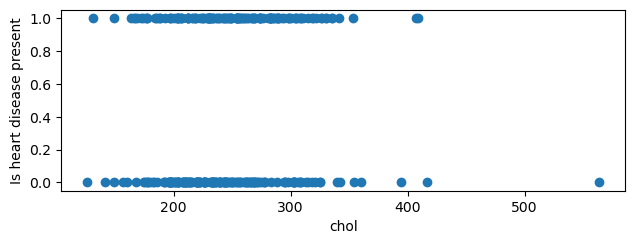

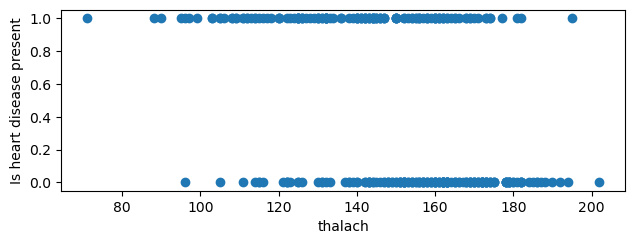

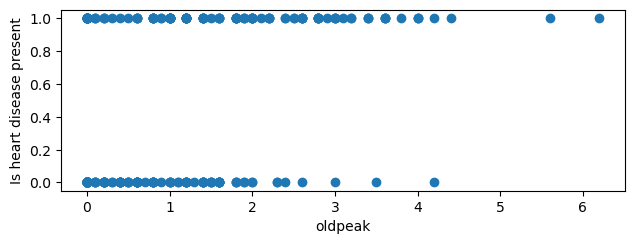

In [115]:
for idx, column in enumerate(continuous_columns):
    plt.figure(figsize=(16, 8))
    plt.subplot(3, 2, idx+1)
    plt.scatter(heart_data[column], heart_data['present'], label=column)
    plt.xlabel(column)
    plt.ylabel('Is heart disease present')
    plt.show()

The only continuous variables that give a modest connection with heart disease are the 'thalach' and 'oldpeak' variable. We can confirm this using a correaltion chart.

<AxesSubplot:>

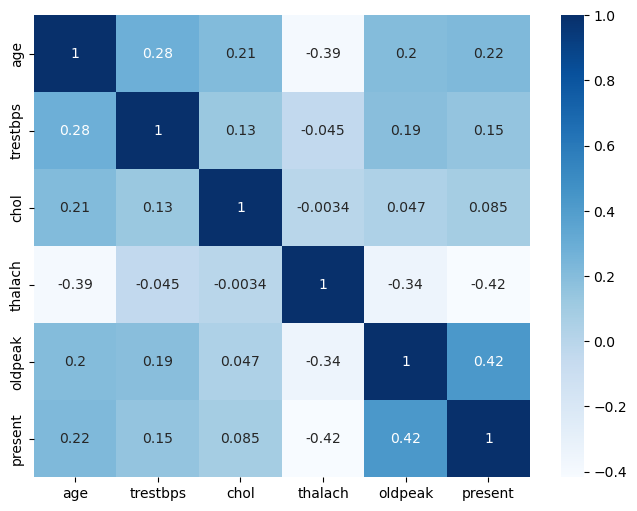

In [116]:
import warnings
warnings.filterwarnings("ignore")

cont_heart_data = heart_data[continuous_columns]
cont_heart_data['present'] = heart_data['present']
correlation = cont_heart_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='Blues')

We can see that 'thalach' and 'oldpeak' has the highest correlation with the 'present' column.

# Buliding the model

In [117]:
X = heart_data.drop('present', axis=1)
y = heart_data['present']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=99)

model = LogisticRegression()

X1_sub = X_train[['cp', 'exang', 'ca', 'thal', 'oldpeak', 'thalach']]
model.fit(X1_sub, y_train)
print('Model Intercept:', model.intercept_)
print('Models coefficients:', model.coef_)

Model Intercept: [-1.10441678]
Models coefficients: [[ 0.5116207   0.59646338  0.97990208  0.44275078  0.61528778 -0.02798717]]


In [118]:
print('Model Accuracy:', model.score(X1_sub, y_train))

Model Accuracy: 0.8678414096916299


Our initial model which used the predictors discovered in the data exploration stage performed with an accuracy of 83% on the training data. This seems to be a good starting point. We can try and improve the accuracy of our model using dummy variables from the discrete data.

Let's first check out the performance on the test data.

In [119]:
X1_sub_test = X_test[['cp', 'exang', 'ca', 'thal', 'oldpeak', 'thalach']]

print('Model Accuracy on test data:', model.score(X1_sub_test, y_test))

Model Accuracy on test data: 0.8157894736842105


We got an accuracy close to that in the training model. We can calculate the senstivity and specificity to know where the model performs well and where it dosen't.

In [120]:
predictions = model.predict(X1_sub)

tp = sum((predictions == 1) & (y_train == 1))
fn = sum((predictions == 0) & (y_train == 1))
senstivity = tp / (fn + tp)

tn = sum((predictions == 0) & (y_train == 0))
fp = sum((predictions == 1) & (y_train == 0))
specificity = tn / (tn + fp)

print('Senstivity:', senstivity)
print('Specificity:', specificity)

Senstivity: 0.7961165048543689
Specificity: 0.9274193548387096


We can observe that our model is better at predicting 'True Negatives' than it is at predicting 'True Positives', hence the higher specificity.

# Model #2

In [121]:
heart_data_dummies = pd.get_dummies(heart_data, columns=['cp', 'ca', 'thal', 'exang'])
print(heart_data_dummies.columns)

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'oldpeak', 'slope', 'present', 'cp_1', 'cp_2', 'cp_3', 'cp_4', 'ca_0',
       'ca_1', 'ca_2', 'ca_3', 'thal_3', 'thal_6', 'thal_7', 'exang_0',
       'exang_1'],
      dtype='object')


Since we know that our initial model is better at predicting True negatives, we will give it variables that slopes slightly towards True positives.

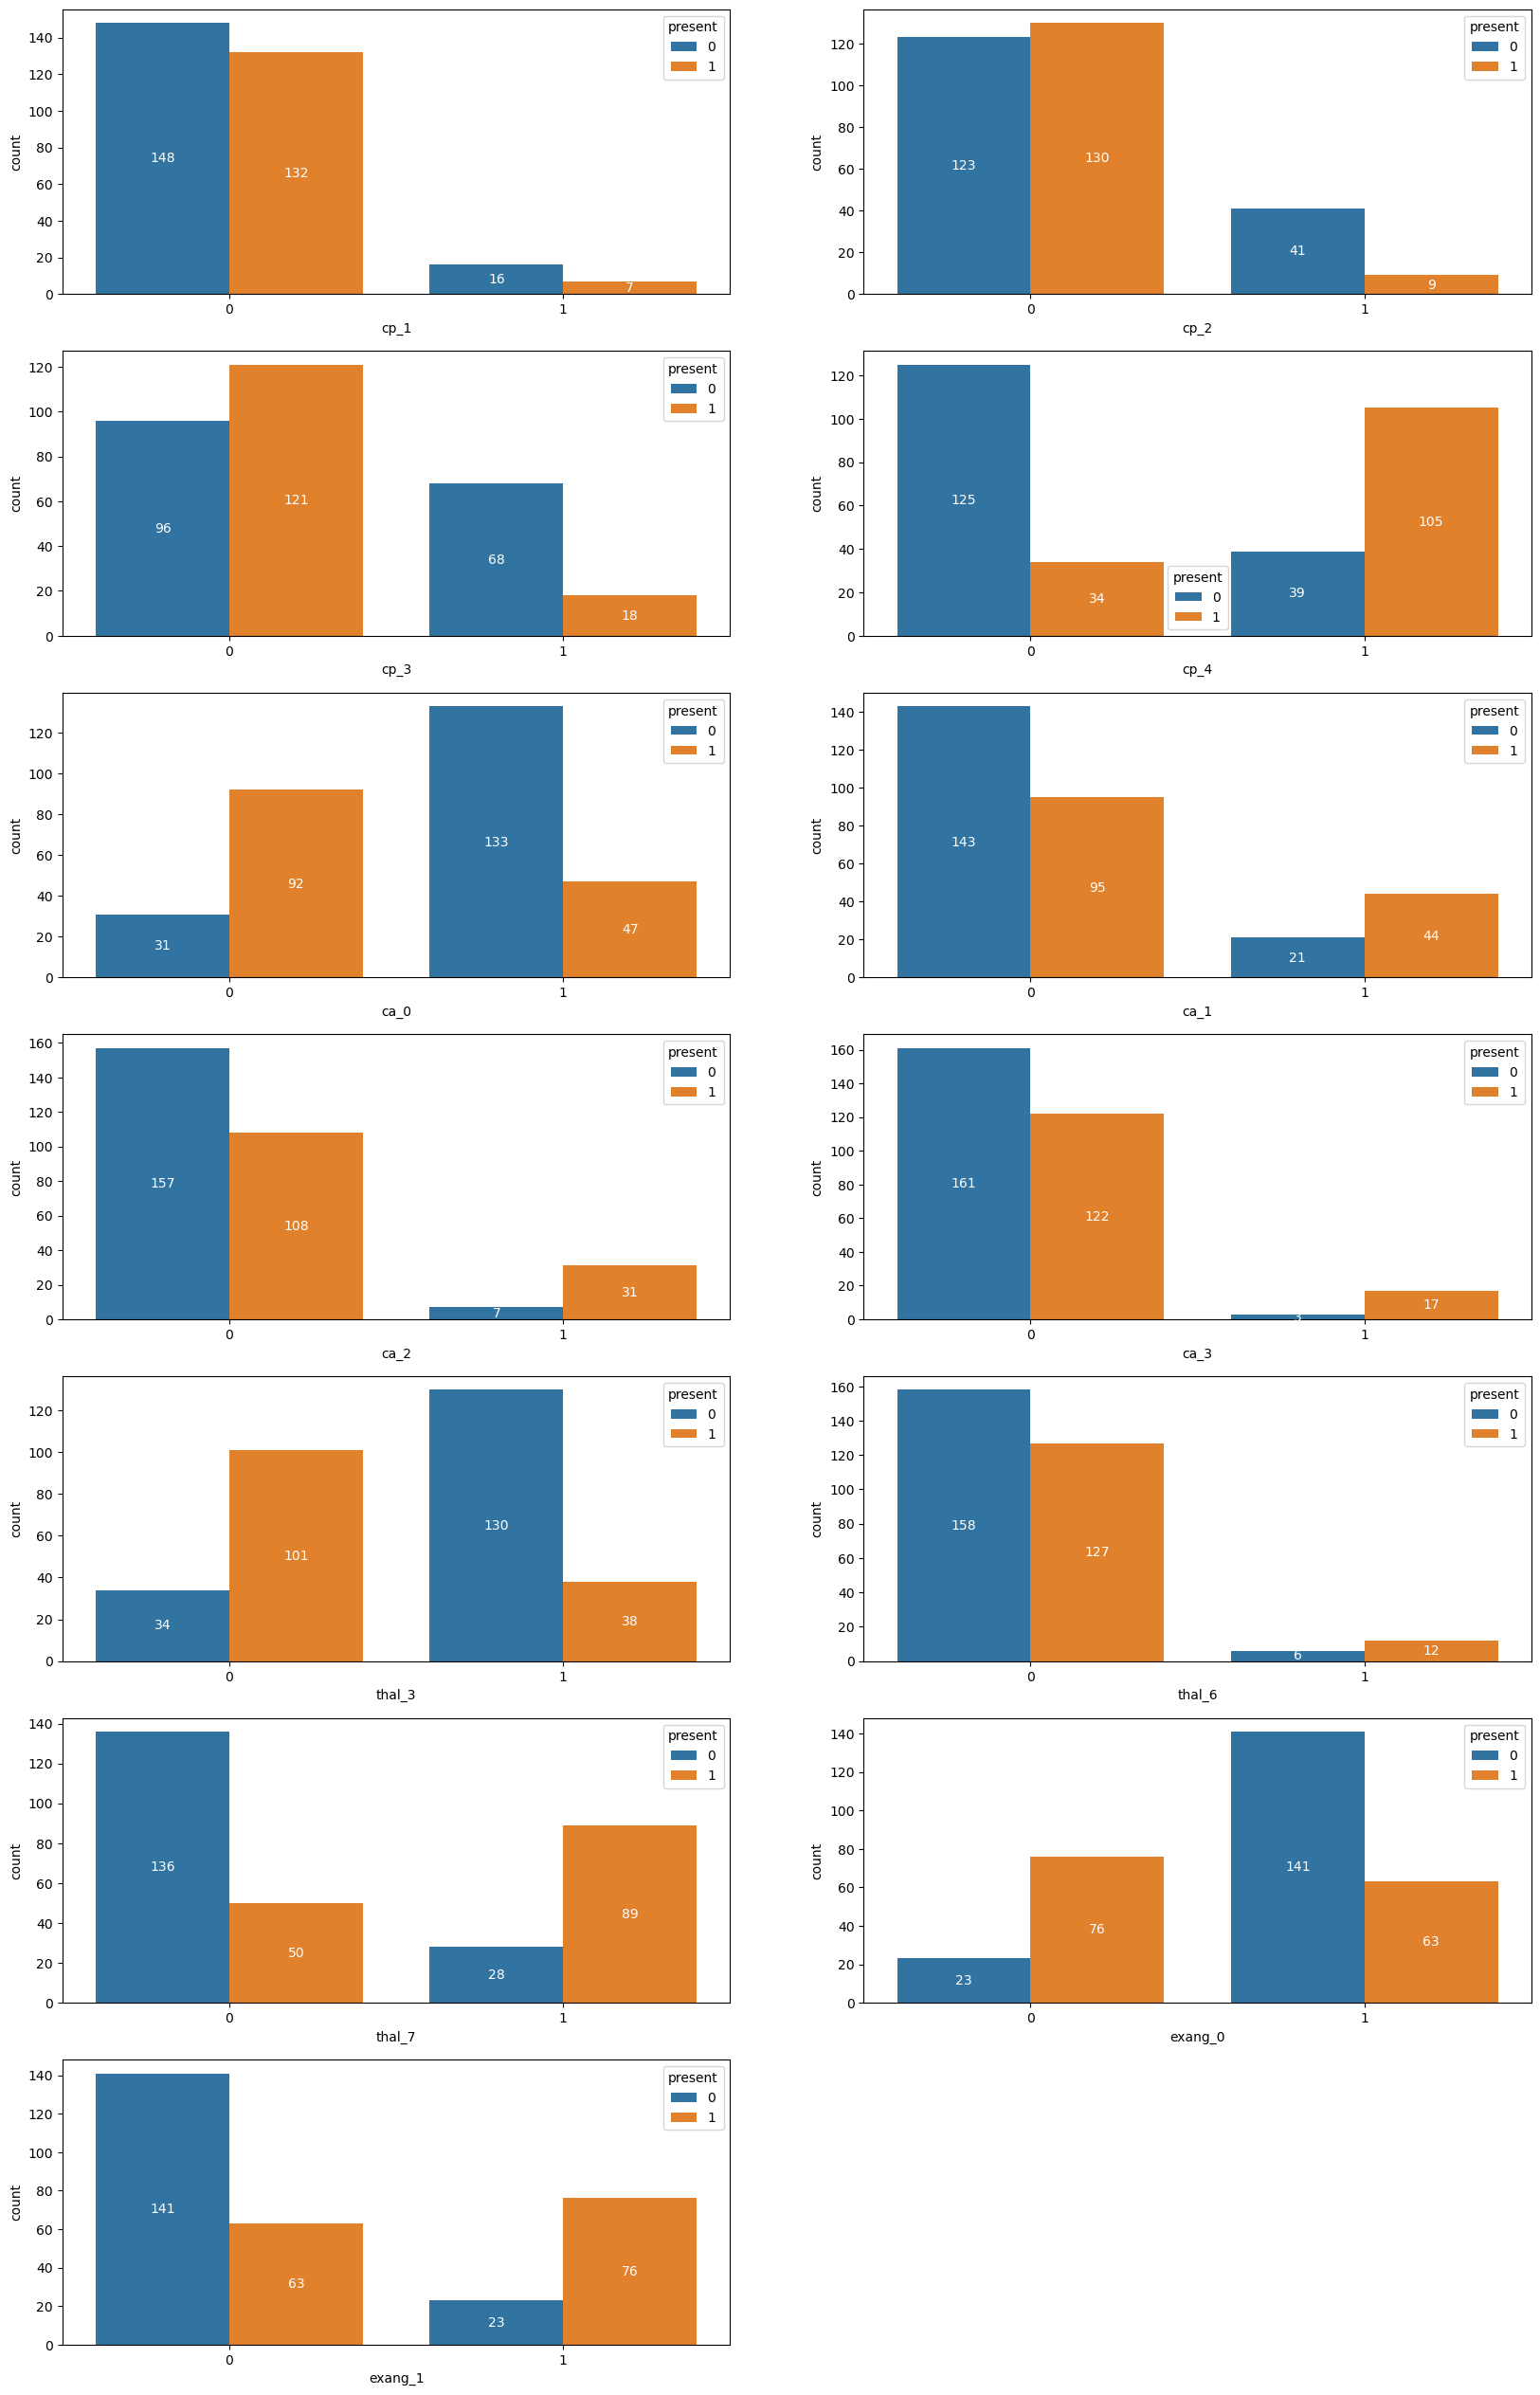

In [122]:
dummy_columns = ['cp_1', 'cp_2', 'cp_3', 'cp_4', 'ca_0','ca_1', 'ca_2', 'ca_3', 'thal_3', 'thal_6', 'thal_7', 'exang_0',
                 'exang_1']
fig = plt.figure(figsize=(20,32))

for idx, col in enumerate(dummy_columns):
    ax = plt.subplot(7, 2, idx+1)
    sns.countplot(x=heart_data_dummies[col], hue=heart_data_dummies["present"], ax=ax)
    for container in ax.containers:
        ax.bar_label(container, label_type="center", color='white')

In [123]:
X = heart_data_dummies.drop('present', axis=1)
y = heart_data_dummies['present']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=99)

X1_sub = X_train[['ca_0', 'cp_4', 'thal_3', 'thal_7', 'exang_0', 'oldpeak']]

model = LogisticRegression()
model.fit(X1_sub, y_train)
print('Model Intercept:', model.intercept_)
print('Models coefficients:', model.coef_)

Model Intercept: [0.0366517]
Models coefficients: [[-1.63139758  1.62385729 -1.01478506  0.65059555 -0.67487324  0.79860472]]


In [124]:
print('Model Accuracy:', model.score(X1_sub, y_train))

Model Accuracy: 0.8546255506607929


Let's check out the senstivity and specificity of our model.

In [125]:
predictions = model.predict(X1_sub)

tp = sum((predictions == 1) & (y_train == 1))
fn = sum((predictions == 0) & (y_train == 1))
senstivity = tp / (fn + tp)

tn = sum((predictions == 0) & (y_train == 0))
fp = sum((predictions == 1) & (y_train == 0))
specificity = tn / (tn + fp)

print('Senstivity:', senstivity)
print('Specificity:', specificity)

Senstivity: 0.8058252427184466
Specificity: 0.8951612903225806


We managed to increase our senstivity by 3 percent while managing to keep the specificity constant. Let's do a final evaluation on the test data.

# Final Evaluation on Test Data

In [126]:
X1_sub_test = X_test[['ca_0', 'cp_4', 'thal_3', 'thal_7', 'exang_0', 'oldpeak']]

print('Model Accuracy on test data:', model.score(X1_sub_test, y_test))

Model Accuracy on test data: 0.8421052631578947


# Conclusion

The accuracy of our models on both the test and training data have hovered around 85% consistently. This means we can predict whether a patient has heart disease or not with a precision of 85%. This may not be the best figures since out of every 100 people, we will be incorrectly diagnosing 15 people.

The next steps to take would be to collect more data since data on just 300 people might not reveal the best predictors of heart disease. 